In [2]:
# from alpha_vantage.timeseries import TimeSeries
# from alpha_vantage.techindicators import TechIndicators
# from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd


In [53]:
stocks_df=pd.read_csv("100_only_bysector_export.csv")
stocks_df=pd.DataFrame(stocks_df)
stocks_df.head()

,Unnamed: 0,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
0,62.111111,583.925556,586.522222,597.758889,606.008889,610.143333,595.255556,586.632222,588.127778,599.860000,...,621.735556,607.886667,597.035556,614.103333,629.635556,621.171111,561.225556,554.725556,508.078889,75.846667
1,57.000000,43.113333,43.300000,43.843333,44.756667,44.676667,45.323333,46.040000,46.183333,46.400000,...,48.096667,47.780000,46.893333,46.936667,46.193333,45.916667,41.046667,43.850000,41.330000,1.783333
2,66.333333,20.870000,20.403333,20.720000,21.086667,21.380000,21.683333,21.590000,20.740000,20.213333,...,24.363333,22.493333,21.063333,21.733333,21.380000,21.273333,18.313333,17.716667,13.056667,7.813333
3,54.062500,117.370937,117.874375,119.219687,121.005000,123.338750,126.453750,127.121875,126.646875,128.183750,...,133.862500,133.301250,132.413125,137.343125,139.796875,138.520000,118.713125,116.071875,102.550625,14.820312
4,47.875000,121.530625,122.656250,126.126875,132.038750,137.385000,138.171250,140.074375,142.211875,143.589375,...,148.343125,144.525000,138.301875,145.253750,148.789375,147.857500,132.204375,136.691250,130.002500,-8.471875


In [49]:
date_df=stocks_df.set_index(['Symbol'])
date_df=date_df.dropna()
date_df=date_df.drop(['Unnamed: 0','Sector', 'Name'], axis=1)
date_df.head()

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Symbol,,,,,,,,,,,,,,,,,,,,,
MMM,155.82,158.10,163.10,166.09,170.09,173.15,171.88,167.60,169.77,171.47,...,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68,14.14
AOS,45.51,47.99,51.01,51.07,50.28,52.08,50.78,48.20,48.40,46.79,...,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49,4.02
ABT,81.99,79.63,82.79,81.65,82.66,83.74,85.71,83.74,85.45,85.48,...,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65,0.34
ABBV,74.66,73.63,76.46,76.53,81.75,85.21,88.63,86.05,87.73,86.98,...,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37,-10.71
ACN,189.64,184.97,187.08,183.07,188.22,189.70,196.81,196.66,201.16,202.55,...,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51,23.13


In [50]:
date_df=date_df.swapaxes("index", "columns") 
date_df=date_df.reset_index()
date_df=date_df.rename(columns={"index": "date_range"})
date_df[:26]

Symbol,date_range,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,...,CPB,COF,CAH,KMX,CCL,CAT,CBOE,CBRE,CNC,CNP
0,2019-10-04,155.82,45.51,81.99,74.66,189.64,55.440,121.15,276.96,159.94,...,47.34,87.32,46.07,85.60,41.14,121.04,116.28,50.67,43.57,29.25
1,2019-10-11,158.10,47.99,79.63,73.63,184.97,54.820,122.02,278.29,158.56,...,46.87,88.82,46.92,90.53,41.55,128.40,115.60,51.82,44.27,28.27
2,2019-10-18,163.10,51.01,82.79,76.46,187.08,54.540,122.93,265.52,163.50,...,47.56,89.80,51.54,94.28,42.79,130.71,116.77,52.21,46.88,28.64
3,2019-10-25,166.09,51.07,81.65,76.53,183.07,55.260,124.90,270.98,165.56,...,46.46,93.25,50.05,94.77,44.57,139.73,114.10,52.61,48.23,29.54
4,2019-11-01,170.09,50.28,82.66,81.75,188.22,55.820,125.99,277.82,164.82,...,46.54,95.25,50.44,94.86,42.95,144.49,114.85,54.79,52.13,29.02
5,2019-11-08,173.15,52.08,83.74,85.21,189.70,54.300,128.08,292.46,167.40,...,46.25,97.26,53.75,93.88,45.05,148.16,114.88,54.89,55.06,28.78
6,2019-11-15,171.88,50.78,85.71,88.63,196.81,53.440,128.38,297.50,162.66,...,47.28,97.38,56.24,98.00,44.85,145.31,119.49,56.44,57.56,25.48
7,2019-11-22,167.60,48.20,83.74,86.05,196.66,53.040,127.31,299.30,157.87,...,46.83,98.10,55.69,97.58,43.68,143.88,123.77,54.91,59.45,24.75
8,2019-11-29,169.77,48.40,85.45,87.73,201.16,54.830,130.78,309.53,157.08,...,46.57,100.01,55.03,97.26,45.08,144.73,118.90,57.02,60.47,24.56
9,2019-12-06,171.47,46.79,85.48,86.98,202.55,55.210,133.80,306.23,154.62,...,47.75,101.38,54.87,97.37,44.77,142.72,120.59,58.50,60.98,25.02


In [51]:
date = date_df.index.astype('O')

In [42]:
symbols = list(date_df.iloc[0])
difference = list(date_df.iloc[-1])

In [45]:
difference_df = pd.DataFrame({'Symbols' : symbols,
                                'Difference' : difference})
difference_df

,Symbols,Difference
0,Symbol,24
1,date_range,Difference
2,MMM,14.14
3,AOS,4.02
4,ABT,0.34
...,...,...
89,CAT,21.4
90,CBOE,21.48
91,CBRE,4.29
92,CNC,-20


,25
0,
Symbol,NaN
date_range,24
MMM,NaN
AOS,NaN
ABT,NaN
...,...
CAT,NaN
CBOE,NaN
CBRE,NaN


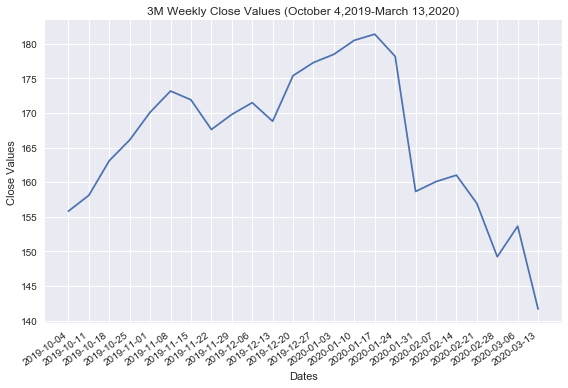

In [47]:
x=date_df["date_range"]
y=date_df["MMM"]
fig, ax=plt.subplots()
ax.plot(x,y);
plt.title("3M Weekly Close Values (October 4,2019-March 13,2020)")
plt.xlabel("Dates")
plt.ylabel("Close Values")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.style.use('seaborn')
plt.tight_layout()
plt.show()

In [3]:
cleaned_stocks=stocks_df.dropna()
cleaned_stocks=cleaned_stocks.drop(['Unnamed: 0'], axis=1)
cleaned_stocks.head()

sector_df=cleaned_stocks.groupby("Sector").mean()
sector_df.head()

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,159.940000,158.560000,163.500000,165.560000,164.820000,167.400,162.660000,157.870000,157.080000,154.620000,...,149.010000,151.050,141.680000,131.750000,132.930000,133.590000,140.610000,132.980000,127.910000,113.690
Financials,64.285000,64.205000,63.645000,65.300000,67.880000,70.500,69.700000,69.200000,70.105000,69.210000,...,67.500000,69.530,67.650000,65.710000,67.225000,67.855000,70.155000,59.035000,55.635000,45.930
Health Care,113.431667,116.176667,119.951667,125.995000,131.015000,132.930,134.750000,136.355000,138.361667,138.441667,...,142.775000,142.295,137.606667,132.308333,136.601667,140.893333,138.505000,123.810000,126.370000,116.065
Industrials,97.862000,99.130000,101.566000,105.392000,106.940000,108.026,108.108000,106.184000,107.598000,108.674000,...,107.730000,109.246,107.958000,102.626000,103.554000,105.370000,102.146000,91.420000,92.880000,85.722
Information Technology,127.640000,126.655000,125.526667,122.661667,124.218333,127.530,129.578333,130.088333,133.116667,132.355000,...,143.364167,146.555,145.435000,142.995000,148.495000,152.228333,150.695833,133.618333,131.218333,123.365


In [4]:
sector_df=sector_df.swapaxes("index", "columns") 
sector_df=sector_df.rename(index={'Sector': 'date_range'})
sector_df.index.name = 'date_range'
sector_df.head()

Sector,Consumer Discretionary,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
date_range,,,,,,,,
2019-10-04,159.94,64.285,113.431667,97.862,127.640000,140.100,154.80,16.03
2019-10-11,158.56,64.205,116.176667,99.130,126.655000,143.100,153.97,16.01
2019-10-18,163.50,63.645,119.951667,101.566,125.526667,141.005,156.01,16.38
2019-10-25,165.56,65.300,125.995000,105.392,122.661667,138.425,158.25,16.80
2019-11-01,164.82,67.880,131.015000,106.940,124.218333,139.025,158.42,17.51


In [11]:
df=sector_df.reset_index()


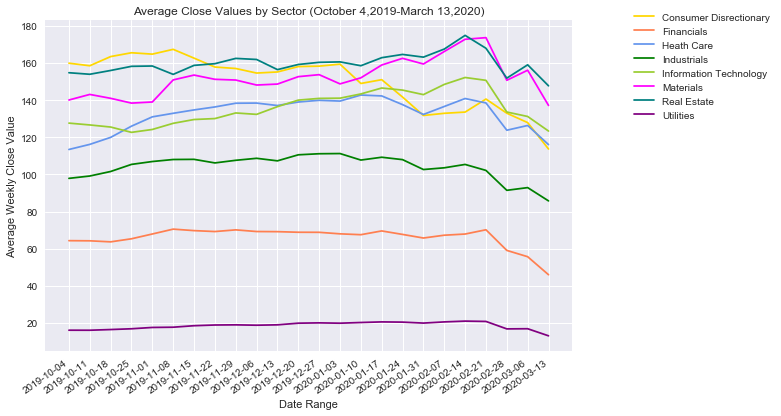

In [46]:
x_axis=df["date_range"]
y_1=df["Consumer Discretionary"]
y_2=df["Financials"]
y_3=df["Health Care"]
y_4=df["Industrials"]
y_5=df["Information Technology"]
y_6=df["Materials"]
y_7=df["Real Estate"]
y_8=df["Utilities"]
fig,ax=plt.subplots()
consumer_discretionary=plt.plot(x_axis, y_1, label="Consumer Disrectionary", color="gold")
fin=plt.plot(x_axis, y_2, label="Financials", color="coral")
hc=plt.plot(x_axis, y_3, label="Heath Care", color="cornflowerblue")
ind=plt.plot(x_axis, y_4, label="Industrials", color="green")
it=plt.plot(x_axis, y_5, label="Information Technology", color="yellowgreen")
mat=plt.plot(x_axis, y_6, label="Materials", color="magenta")
re=plt.plot(x_axis, y_7, label="Real Estate",color="teal")
ut=plt.plot(x_axis, y_8, label="Utilities", color="purple")
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(35)
plt.tight_layout()
plt.style.use('seaborn')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Average Close Values by Sector (October 4,2019-March 13,2020)")
plt.xlabel("Date Range")
plt.ylabel("Average Weekly Close Value")
plt.show()
